In [1]:
!pip install kaggle
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import fastai
from fastai.tabular.all import *

In [3]:
od.download("https://www.kaggle.com/datasets/uciml/iris")
train = pd.read_csv("/content/iris/Iris.csv")
train.info()
df = pd.DataFrame(train)
df.Species.unique()


Dataset URL: https://www.kaggle.com/datasets/uciml/iris


100%|██████████| 3.60k/3.60k [00:00<00:00, 1.89MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
train.drop(columns = ["Id"], axis = 1, inplace = True)
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
n = []
stay = ["Species"]

for i in train.columns:
    if i not in stay:
      n.append(i)

print(train[n].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [8]:
splits = RandomSplitter(valid_pct=0.1)(range_of(train))

to = TabularPandas(train,
                   procs=[Normalize, Categorify, FillMissing],
                   cont_names = n,
                   y_names='Species',
                   splits=splits)

to.xs.head()
dls = to.dataloaders(bs=64)
dls.show_batch()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.6,2.7,4.2,1.3,Iris-versicolor
1,4.4,2.9,1.4,0.2,Iris-setosa
2,6.3,2.9,5.6,1.8,Iris-virginica
3,6.9,3.1,5.1,2.3,Iris-virginica
4,6.8,3.2,5.9,2.3,Iris-virginica
5,5.5,2.4,3.8,1.1,Iris-versicolor
6,5.4,3.0,4.5,1.5,Iris-versicolor
7,6.3,2.9,5.6,1.8,Iris-virginica
8,5.0,2.0,3.5,1.0,Iris-versicolor
9,6.3,2.5,4.9,1.5,Iris-versicolor


In [18]:
from fastai.callback.tracker import EarlyStoppingCallback
early_stop = EarlyStoppingCallback(monitor = "accuracy", patience= 5)

learn = tabular_learner(dls,
                        metrics=accuracy,
                        lr= 0.00017,
                        wd = 0.01,
                        cbs = early_stop)

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0008317637839354575)

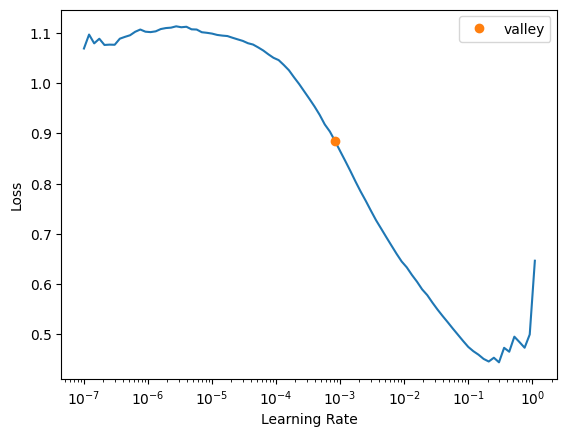

In [17]:
learn.lr_find()

In [19]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,1.110183,1.072705,0.200000,00:00
1,1.097691,1.069439,0.200000,00:00
2,1.097284,1.065451,0.200000,00:00
3,1.090710,1.055089,0.200000,00:00
4,1.087814,1.039488,0.200000,00:00
5,1.090803,1.016303,0.333333,00:00
6,1.076470,0.987632,0.600000,00:00
7,1.068635,0.950110,0.733333,00:00
8,1.054112,0.903075,0.800000,00:00
9,1.038285,0.842998,0.866667,00:00


No improvement since epoch 17: early stopping


In [20]:
learn.show_results()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_pred
0,0.983058,0.604507,1.052206,1.679109,2.0,2.0
1,0.250512,-0.299742,0.464503,0.189577,1.0,1.0
2,-0.604124,0.830570,-1.416145,-1.164543,0.0,0.0
3,-0.970397,1.056632,-1.474916,-1.299955,0.0,0.0
4,-0.115760,-0.751867,0.111881,-0.352071,1.0,1.0
5,-1.580852,1.282694,-1.709997,-1.435367,0.0,0.0
6,-1.214579,-0.073680,-1.474916,-1.435367,0.0,0.0
7,-1.214579,-0.073680,-1.474916,-1.435367,0.0,0.0
8,-1.214579,-0.073680,-1.474916,-1.435367,0.0,0.0
